In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import glob
import os
import cv2
import torch
import torch.nn as nn
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
from torch.utils.data import random_split
# set the numpy seed for better reproducibility
import numpy as np
# import the necessary packages
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torchvision.transforms import ToTensor
import argparse
import imutils
import torch
import cv2
import time
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [17]:
# Load the saved numpy arrays
np_train_data = np.load('/home/yoson/SparseInst/official/SparseInst/table-tennis/ball_classify/training/ball_train_data.npy')
np_train_label = np.load('/home/yoson/SparseInst/official/SparseInst/table-tennis/ball_classify/training/ball_train_label.npy')
print(np_train_data.shape)
print(np_train_label.shape)

(30, 12, 1)
(30, 1)


In [18]:
# from PIL import Image
# from matplotlib import cm

# for index, sequence in  enumerate(np_train_data):
#     for img_index, image in enumerate(sequence):
#         np_train_data[index][img_index] = Image.fromarray(image, mode='L')
        

In [19]:
# np_train_data = np.asarray(np_train_data).astype(np.float32()) / 255.0
# print(np_train_data.shape)

In [20]:
# define training hyperparameters
INIT_LR = 1e-4
BATCH_SIZE = 4
EPOCHS = 10

In [16]:
np_train_data_reshape = np_train_data

train_data_list = []
# test_data_list = []
for i in range(len(np_train_data_reshape)):
#     print(np_train_data_reshape[i].shape())
    train_data_list.append([np_train_data_reshape[i], np_train_label[i]])
    
    
dataset = train_data_list
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
i1, l1 = next(iter(train_dataset))
# print(np.shape((train_dataset)), np.shape(val_dataset))
print(np.shape(train_dataset))
print(np.shape(train_dataset[0][0]))
# print(train_dataset[0][0])


# Split test
train_size2 = int(0.9 * len(train_dataset))
test_size = len(train_dataset) - train_size2
train_dataset, test_dataset = random_split(train_dataset, [train_size2, test_size])
i1, l1 = next(iter(train_dataset))
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(i1.shape)


# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# trainDataLoader = DataLoader(train_dataset, shuffle=False, batch_size=BATCH_SIZE)
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# calculate steps per epoch for training and validation set
# trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
# valSteps = len(valDataLoader.dataset) // BATCH_SIZE

trainSteps = len(train_dataset) // BATCH_SIZE
valSteps = len(val_dataset) // BATCH_SIZE

(24, 2)
(12, 1)
21 6 3
(12, 1)


/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [5]:
# Split Dataset in order
# 3D
reshape_np_train_data = np.expand_dims(np_train_data, axis=1)
print(reshape_np_train_data.shape)
np_train_data_reshape = reshape_np_train_data

train_data_list = []
# test_data_list = []
for i in range(len(np_train_data_reshape)):
#     print(np_train_data_reshape[i].shape())
    train_data_list.append([np_train_data_reshape[i], np_train_label[i]])

dataset = train_data_list
split_index = int(0.8 * len(dataset))
train_dataset_temp = dataset[:split_index]
val_dataset = dataset[split_index:]

split_index_2 = int(0.9 * len(train_dataset_temp))
train_dataset = train_dataset_temp[:split_index_2]
test_dataset = train_dataset_temp[split_index_2:] 

print(len(train_dataset), len(val_dataset), len(test_dataset))
print(np.shape(train_dataset[0][0]))

# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
testDataLoader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# calculate steps per epoch for training and validation set
# trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
# valSteps = len(valDataLoader.dataset) // BATCH_SIZE

trainSteps = len(train_dataset) // BATCH_SIZE
valSteps = len(val_dataset) // BATCH_SIZE


(7660, 1, 12, 256, 256)
5515 1532 613
(1, 12, 256, 256)


In [8]:
for x, y in trainDataLoader:
    print(np.unique(x))
    break

[  0   4   8  10  12  16  18  20  24  26  28  31  32  36  39  40  41  42
  44  45  47  48  49  50  51  52  53  55  56  57  58  59  60  61  63  64
  65  66  67  68  69  71  72  73  75  76  77  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 121 122
 123 124 125 126 128 129 130 131 132 133 134 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161
 162 163 165 166 167 168 169 171 172 173 174 175 177 179 180 181 183 184
 185 186 187 188 189 192 193 194 196 197 199 200 202 203 204 205 208 210
 211 212 214 216 218 220 222 224 228 230 232 235 236 243 245 249 255]


In [37]:
# 3D
# reshape_np_train_data = np.expand_dims(np_train_data, axis=1)
reshape_np_train_data = np_train_data.reshape((len(np_train_data), 1, 12))
print(reshape_np_train_data.shape)
np_train_data_reshape = reshape_np_train_data

train_data_list = []
# test_data_list = []
for i in range(len(np_train_data_reshape)):
#     print(np_train_data_reshape[i].shape())
    train_data_list.append([np_train_data_reshape[i], np_train_label[i]])
    
    
dataset = train_data_list
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
i1, l1 = next(iter(train_dataset))
# print(np.shape((train_dataset)), np.shape(val_dataset))
# print(train_dataset.shape)

# reshape_train_dataset = np.expand_dims(train_dataset, axis=0)
# print(np.shape(reshape_train_dataset))
print('------')
print(train_dataset[0][0].shape)
# print(train_dataset[0][0])


# Split test
train_size2 = int(0.9 * len(train_dataset))
test_size = len(train_dataset) - train_size2
train_dataset, test_dataset = random_split(train_dataset, [train_size2, test_size])
i1, l1 = next(iter(train_dataset))
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(i1.shape)


# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# trainDataLoader = DataLoader(train_dataset, shuffle=False, batch_size=BATCH_SIZE)
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# calculate steps per epoch for training and validation set
# trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
# valSteps = len(valDataLoader.dataset) // BATCH_SIZE

trainSteps = len(train_dataset) // BATCH_SIZE
valSteps = len(val_dataset) // BATCH_SIZE

(30, 1, 12)
------
(1, 12)
21 6 3
(1, 12)


In [56]:
# model

class Conv1DNet(nn.Module):
    def __init__(self, num_classes):
        super(Conv1DNet, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.2)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 3, 64)  # Adjust the input size based on the output shape of the last conv layer
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        print('-------------------------------')
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout(x)
        x = self.conv3(x)
        x = self.relu3(x)
        print(x.shape)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x
    

In [46]:
(4x768 and 1536x64)

SyntaxError: invalid decimal literal (1109658120.py, line 1)

In [ ]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, batch_first=True, bidirectional=True
        )
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

In [57]:
# initialize the Conv3DNet model
print("[INFO] initializing the Conv3DNet model...")
num_classes = 2
model = Conv1DNet(num_classes)
# model = Conv2DNet(num_classes)
print(model)

[INFO] initializing the Conv3DNet model...
Conv1DNet(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (maxpool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=768, out_features=64, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [58]:
# initialize our optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr = INIT_LR)
criterion = nn.CrossEntropyLoss()
# initialize a dictionary to store training history
H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)
model = model.cuda()
# model = model.to(device)
criterion = criterion.to(device)

cuda


In [59]:
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

# loop over our epochs
for idx, e in enumerate(range(0, EPOCHS)):
    print('------------------------------------------------------------------------------------------------')
    print(f'Epoch {e + 1}/{EPOCHS}:', end = ' ')

    # set the model in training mode
    model = model.cuda()
    model.train()
    
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    
    # initialize the number of correct predictions in the training and validation step
    trainCorrect = 0
    valCorrect = 0
    
    # loop over the training set
    for x, y in trainDataLoader:
        # send the input to the device
#         (x, y) = (x.to(device), y.to(device))
        x = x.float().cuda(non_blocking = True)
        y = y.view(-1).cuda(non_blocking = True)
        
        # perform a forward pass and calculate the training loss
        pred = model(x)
        loss = criterion(pred, y)
        # print(pred)
        # print('--------------------------')
        # print(labels)
        
        # zero out the gradients, perform the backpropagation step, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # add the loss to the total training loss so far and calculate the number of correct predictions
        totalTrainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()
        
      
        
        
        
    # switch off autograd for evaluation
    with torch.no_grad():
        # set the model in evaluation mode
        model = model.cuda()
        model.eval()
        # loop over the validation set
        for (x, y) in valDataLoader:
            # send the input to the device
#             (x, y) = (x.to(device), y.to(device))
            x = x.float().cuda(non_blocking = True)
            y = y.view(-1).cuda(non_blocking = True)
        
            # make the predictions and calculate the validation loss
            pred = model(x)
            totalValLoss += criterion(pred, y)
            
            # calculate the number of correct predictions
            valCorrect += (pred.argmax(1) == y).type(torch.float).sum().item() 
        
#     torch.save(model.state_dict(), f'/home/yoson/SparseInst/official/SparseInst/table-tennis/pose_data/model/modelS_splitorder_pose_model_allframe_{idx}.pth')
        
    # calculate the average training and validation loss
    avgTrainLoss = totalTrainLoss / trainSteps
    avgValLoss = totalValLoss / valSteps
    # calculate the training and validation accuracy
    trainCorrect = trainCorrect / len(trainDataLoader.dataset)
    valCorrect = valCorrect / len(valDataLoader.dataset)
    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["train_acc"].append(trainCorrect)
    H["val_loss"].append(avgValLoss.cpu().detach().numpy())
    H["val_acc"].append(valCorrect)
    
    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
        avgTrainLoss, trainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
        avgValLoss, valCorrect))
        
        
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))

[INFO] training the network...
------------------------------------------------------------------------------------------------
Epoch 1/10: -------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([2, 256, 3])
[INFO] EPOCH: 1/10
Train loss: 0.927209, Train accuracy: 0.5238
Val loss: 3.163686, Val accuracy: 0.5000

------------------------------------------------------------------------------------------------
Epoch 2/10: -------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-----------------------------

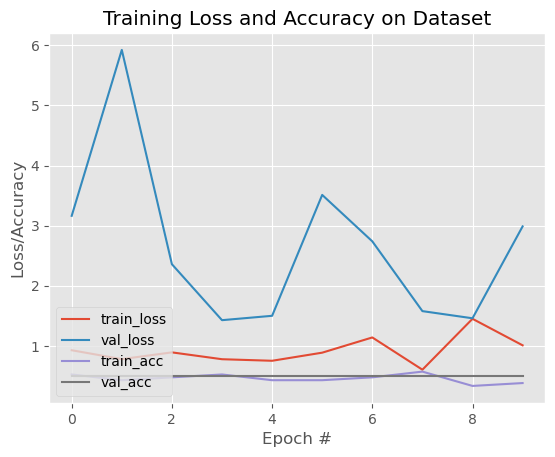

In [60]:
# plot the training loss and accuracy8x4194304 
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig(args["plot"])
# serialize the model to disk
# torch.save(model, args["model"])

In [ ]:
torch.save(model.state_dict(), '/home/yoson/SparseInst/official/SparseInst/table-tennis/pose_data/model/splitorder_pose_model_allframe_1378.pth')

In [62]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in trainDataLoader:
        # send the input to the device
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        
# generate a classification report
print(classification_report([y[0] for x,y in train_dataset], preds, labels=[1, 2]))

[INFO] evaluating network...
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([4, 256, 3])


ValueError: Found input variables with inconsistent numbers of samples: [21, 20]

In [63]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in valDataLoader:
        # send the input to the device
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        
# generate a classification report
print(classification_report([y[0] for x,y in val_dataset], preds, labels=[1, 2]))

[INFO] evaluating network...
-------------------------------
torch.Size([4, 256, 3])
-------------------------------
torch.Size([2, 256, 3])
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         0

   micro avg       0.50      1.00      0.67         3
   macro avg       0.25      0.50      0.33         3
weighted avg       0.50      1.00      0.67         3



/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [64]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in testDataLoader:
        # send the input to the device
#         print(x)
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        
# generate a classification report
print(classification_report([y[0] for x,y in test_dataset], preds, labels=[1, 2]))

[INFO] evaluating network...
-------------------------------
torch.Size([3, 256, 3])
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         0

   micro avg       0.67      1.00      0.80         2
   macro avg       0.33      0.50      0.40         2
weighted avg       0.67      1.00      0.80         2



/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoson/anaconda3/envs/SparseInst/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [ ]:
[y for x,y in test_dataset]

In [ ]:
preds

# Model Evaluate

In [ ]:
model_eval = Conv3DNet(num_classes)
model_eval.load_state_dict(torch.load('/home/yoson/SparseInst/official/SparseInst/table-tennis/pose_data/model/splitorder_pose_model_allframe_1377.pth'))
model_eval.eval()

In [ ]:
model_eval

In [ ]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
ys = []
with torch.no_grad():
    # set the model in evaluation mode
    model_eval = model_eval.cuda()
    model_eval.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in trainDataLoader:
#         print(np.array(x).shape)
        # send the input to the device
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model_eval(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        ys.extend(y.cpu().numpy())
        
# generate a classification report
print(classification_report(ys, preds, labels=[1, 2, 3, 4, 0]))
# print(np.array(preds).shape)
# print(preds)
# print("------------------------------")
# print([y[0] for x,y in train_dataset])

In [ ]:
# generate a classification report
# print(len(gt_label.reshape(gt_label.shape[0])))
# # print(gt_label)
# print(np.array(preds).shape)
# print(preds)
print(classification_report(ys, preds, labels=[1, 2, 3, 4, 0]))

labels = ['1', '2', '3', '4', '0']
cm = confusion_matrix(ys, preds)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
f.set_xticklabels(labels)
f.set_yticklabels(labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation

ys_val = []
with torch.no_grad():
    # set the model in evaluation mode
    model_eval = model_eval.cuda()
    model_eval.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in valDataLoader:
        # send the input to the device
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model_eval(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        ys_val.extend(y.cpu().numpy())
        
# generate a classification report
print(classification_report([y[0] for x,y in val_dataset], preds, labels=[1, 2, 3, 4, 0]))

In [ ]:
# generate a classification report
# print(len(gt_label.reshape(gt_label.shape[0])))
# # print(gt_label)
# print(np.array(preds).shape)
# print(preds)
print(classification_report(ys_val, preds, labels=[1, 2, 3, 4, 0]))

labels = ['1', '2', '3', '4', '0']
cm = confusion_matrix(ys_val, preds)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
f.set_xticklabels(labels)
f.set_yticklabels(labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import classification_report
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation

ys_test = []
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in testDataLoader:
        # send the input to the device
#         print(x)
#         x = x.to(device)
        x = x.float().cuda(non_blocking=True)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        ys_test.extend(y.cpu().numpy())
        
# generate a classification report
print(classification_report([y[0] for x,y in test_dataset], preds, labels=[1, 2, 3, 4, 0]))

In [ ]:
# generate a classification report
# print(len(gt_label.reshape(gt_label.shape[0])))
# # print(gt_label)
# print(np.array(preds).shape)
# print(preds)
print(classification_report(ys_test, preds, labels=[1, 2, 3, 4, 0]))

labels = ['1', '2', '3', '4', '0']
cm = confusion_matrix(ys, preds)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
f.set_xticklabels(labels)
f.set_yticklabels(labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
#   Training process begins
train_loss_list = []
num_epochs = EPOCHS
for epoch in range(num_epochs):
    print('------------------------------------------------------------------------------------------------')
    print(f'Epoch {epoch + 1}/{num_epochs}:', end = ' ')
    train_loss = 0

    #Iterating over the training dataset in batches
    model = model.cuda()
    model.train()
    for (images, labels) in trainDataLoader:
        #Extracting images and target labels for the batch being iterated
        images = images.float().cuda(non_blocking = True)
        labels = labels.view(-1).cuda(non_blocking = True)

        #Calculating the model output and the cross entropy loss
        pred = model(images)
        loss = criterion(pred, labels)
        # print(pred)
        # print('--------------------------')
        # print(labels)

        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(trainDataLoader))
    print(f"Training loss = {train_loss_list[-1]}")

In [ ]:
#Plotting loss for all epochs
plt.plot(range(1, num_epochs + 1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [ ]:
test_acc = 0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(trainDataLoader):
         
            
        images = images.float().cuda(non_blocking = True)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(trainDataLoader)} %")

In [ ]:
# switch off autograd for evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    # loop over the validation set
    for (datas, labels) in valDataLoader:
        # send the input to the device
        (x, y) = (x.to(device), y.to(device))


        datas = datas.float().cuda(non_blocking = True)
        labels = labels.view(-1).cuda(non_blocking = True)

        # make the predictions and calculate the validation loss
        pred = model(x)
        totalValLoss += lossFn(pred, y)
        # calculate the number of correct predictions
        valCorrect += (pred.argmax(1) == y).type(
            torch.float).sum().item()

# before version

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import glob
import tensorflow
import os
import cv2

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
tensorflow.test.is_gpu_available()

In [ ]:
# Datasets Preprocessing

dataset_path = './ball_data/pose_label/label/test'

train_data = []
train_label = []
batch=12
window_size = 12
for _, walk_item in enumerate(os.walk(dataset_path)):

    root, dirs, files = walk_item

    if not dirs and files:

        label_path = None

        for file in files:

            if "_label.csv" in file:
                label_path = os.path.join(root, file)

        if label_path:
            ## 讀取動作區間標記
            label_df = pd.read_csv(f'{label_path}')
            label_df['label'] = label_df['label'].astype(int)

            n = 4
            k = batch//2
            ## 動作區間篩選
            for _, row in label_df.iterrows():
                ## 在動作的Frame區間 且 屬於動作者的骨幹資料
                # if row['label'] in range(1, 5):
                #     pd_filter_1 = label_df['Person_id'] == 0
                # elif row['label'] in range(5, 9):
                #     pd_filter_1 = label_df['Person_id'] == 1

                # if row['label'] in [1, 5]:
                #     label = [1]
                # elif row['label'] in [2, 6]:
                #     label = [2]
                # elif row['label'] in [3, 4, 7, 8]:
                #     label = [0]


                # if row['label'] in range(1, 5):
                #     pd_filter_1 = label_df['Person_id'] == 0
                # elif row['label'] in range(5, 9):
                #     pd_filter_1 = label_df['Person_id'] == 1

                if int(row['label']) in [5]:         # 右正手發球
                    label = [1]
                elif int(row['label']) in [6]:       # 右反手發球
                    label = [2]
                elif int(row['label']) in [7]:       # 右正手回球
                    label = [3]
                elif int(row['label']) in [8]:       # 右反手回球
                    label = [4]
                else:
                    label = [0]


                for i in range((row['end'] - row['start'] - window_size) + 1):
                    print('group_num', (row['end'] - row['start'] - window_size) + 1)
                    img_list = []
                    begin = row['start'] + i
                    for j in range (begin, begin + 12):
                        # img_list.append(cv2.imread(f'/home/yoson/SparseInst/official/SparseInst/table-tennis/label_mask/merge_R/merge_R_frame_{j}.png'))
                        img = cv2.imread(f'./label_mask/merge_R_gray/merge_R_frame_{j}.png')
#                         img = cv2.imread(f'/home/yoson/SparseInst/official/SparseInst/table-tennis/label_mask/merge_R_rgb/merge_R_frame_{j}.png')
                        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)    # (1080, 960) (256, 256)
                        img_list.append(img)

                        print(img.shape)
              
        
                    print("start: ", begin)
                    print("end: ", begin + 12)
                    print("label: ", label)
                    print(row['label'])
                    print(len(img_list))
                    img_list_np = np.asarray(img_list)
                    print(img_list_np.shape)

                    train_data.append(img_list)
                    train_label.append(label)

            # train_data.append("/home/yoson/SparseInst/official/SparseInst/table-tennis/label_mask/merge_R/", )
            # train_label.append(label)


print("--------------------------------------------------------------------")
# np_train_data = np.asarray(train_data).reshape(-1, window_size, 256, 256, 3)
np_train_data = np.asarray(train_data)
print(np_train_data.shape)
np_train_label = np.asarray(train_label).reshape(-1, 1)
print(np_train_label.shape)
print(np_train_label)

In [ ]:
np_train_data.shape, np_train_label.shape

In [ ]:
np_train_data.shape
# print(data2[0])
# np.min(data2[0])
# plt.imshow(data2[0])
# cv2.imshow(np_train_data[0])
# plt.imshow(cv2.cvtColor(np_train_data[0], cv2.COLOR_BGR2RGB))

In [ ]:
# Build Model

num_classes = 5

model = models.Sequential()

model.add(layers.Conv3D(64, 3, padding='same',activation='relu', input_shape=(12, 256, 256, 3), data_format='channels_first'))

model.add(layers.MaxPooling3D(2))

model.add(layers.Conv3D(128, 3, padding='same', activation='relu', data_format='channels_first'))

model.add(layers.MaxPooling3D(2))

model.add(layers.Dropout(0.2))

model.add(layers.Conv3D(256, 3, padding='same', activation='relu', data_format='channels_first'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Build Model

num_classes = 5

model = models.Sequential()

model.add(layers.Conv2D(64, 3, padding='same',activation='relu', input_shape=(12, 512, 512), data_format='channels_first'))

model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(128, 3, padding='same', activation='relu', data_format='channels_first'))

model.add(layers.MaxPooling2D(2))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, 3, padding='same', activation='relu', data_format='channels_first'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
num_classes = 5

model = models.Sequential()

model.add(layers.Conv3D(64, (3, 3, 3), padding='same', activation='relu', input_shape=(12, 512, 512, 1), data_format='channels_last'))
model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))

model.add(layers.Conv3D(128, (3, 3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))

model.add(layers.Conv3D(256, (3, 3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(
    
    optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 1e-4),
    
    loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(),
    
    metrics = [tensorflow.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history = model.fit(np_train_data, np_train_label, epochs = 30, batch_size = 8, validation_split = 0.2)

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')

plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_sparse_categorical_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0, 1])

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(np_train_data,  np_train_label, verbose=2)

In [ ]:
import torch
import torch.nn as nn
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
from torch.utils.data import random_split
# set the numpy seed for better reproducibility
import numpy as np
np.random.seed(42)
# import the necessary packages
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
import argparse
import imutils
import torch
import cv2
import time

In [ ]:
class Conv3DNet(nn.Module):
    def __init__(self, num_classes):
        super(Conv3DNet, self).__init__()
        
        self.conv1 = nn.Conv3d(3, 64, kernel_size=3, padding='same')
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool3d(kernel_size=2)
        
        self.conv2 = nn.Conv3d(64, 128, kernel_size=3, padding='same')
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool3d(kernel_size=2)
        
        self.dropout = nn.Dropout(p=0.2)
        
        self.conv3 = nn.Conv3d(128, 256, kernel_size=3,  padding='same')
        self.relu3 = nn.ReLU()
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(256 * 3 * 64 * 64, 64)
        self.relu4 = nn.ReLU()
        
        self.fc2 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        print(f'x  : {x.shape}')
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        print(f'x maxpool1 : {x.shape}')
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.dropout(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        print(f'x shape : {x.shape}')
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu4(x)
        
        x = self.fc2(x)
        output  = self.softmax(x)
        
        return output 

num_classes = 5
model = Conv3DNet(num_classes)
print(model)

In [ ]:
class Conv2DNet(nn.Module):
    def __init__(self, num_classes):
        super(Conv2DNet, self).__init__()
        self.conv1 = nn.Conv2d(12, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout2d(p=0.2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 64 * 64, 64)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

num_classes = 5
model = Conv2DNet(num_classes)
print(model)

In [ ]:
np_train_data.shape

In [ ]:
# np_train_data_reshape = np_train_data.transpose((0,4,1,2,3))
np_train_data_reshape = np_train_data

In [ ]:
np_train_data_reshape

In [ ]:
for i in np_train_data_reshape:
    print(i.shape)

In [ ]:
# define training hyperparameters
INIT_LR = 1e-4
BATCH_SIZE = 2
EPOCHS = 100

# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data_list = []
for i in range(len(np_train_data_reshape)):
#     print(np_train_data_reshape[i].shape())
    train_data_list.append([np_train_data_reshape[i], np_train_label[i]])

# trainloader = torch.utils.data.DataLoader(train_data_list, shuffle=True, batch_size=BATCH_SIZE)
# i1, l1 = next(iter(trainloader))
# print(i1.shape)

In [ ]:
dataset = train_data_list
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
i1, l1 = next(iter(train_dataset))
print(len(train_dataset))
print(i1.shape)

In [ ]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)

# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [ ]:
# initialize the Conv3DNet model
print("[INFO] initializing the Conv3DNet model...")
num_classes = 5
# model = Conv3DNet(num_classes)
model = Conv2DNet(num_classes)
print(model)
# print(model)

# initialize our optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss = nn.CrossEntropyLoss()
# initialize a dictionary to store training history
H = {
    "train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = model.to(device)

device

In [ ]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)
model = model.cuda()
# model = model.to(device)
loss = loss.to(device)

# loop over our epochs
for e in range(0, EPOCHS):
    # set the model in training mode
    model.train()
    
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    
    # initialize the number of correct predictions in the training
    # and validation step
    trainCorrect = 0
    valCorrect = 0
    
    # loop over the training set
    for (x, y) in trainDataLoader:
        # send the input to the device
#         (x, y) = (x.to(device), y.to(device))
#         (x, y) = (x.to(device).type(torch.FloatTensor), y.to(device))
        x = x.cuda(non_blocking=True)
        y = y.cuda(non_blocking=True)
        print(x.device)
        exit()
        # perform a forward pass and calculate the training loss
        pred = model(x)
        print(pred)
        print('---------')
        print(y)
        exit()
        loss = loss(pred, y)
        
        # zero out the gradients, perform the backpropagation step,
        # and update the weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        # add the loss to the total training loss so far and
        # calculate the number of correct predictions
        totalTrainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

In [ ]:
x = torch.randint(1, 1000, (100, 100))

In [ ]:
print('Device Name: ' , x.device)

In [ ]:
x = x.to(torch.device('cuda'))

In [ ]:
print('Device Name after transferring: ', x.device)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
model.to(torch.device('cuda:0'))

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model = model.to(device)

# loop over our epochs
for e in range(0, EPOCHS):
    # set the model in training mode
    model.train()
    
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    
    # initialize the number of correct predictions in the training
    # and validation step
    trainCorrect = 0
    valCorrect = 0
    
    # loop over the training set
    for (x, y) in trainDataLoader:
        # send the input and target tensors to the device
        (x, y) = (x.to(device).type(torch.FloatTensor), y.to(device))
        
        # perform a forward pass and calculate the training loss
        pred = model(x)
        loss = loss_function(pred, y)
        
        # zero out the gradients, perform the backpropagation step,
        # and update the weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        # add the loss to the total training loss so far and
        # calculate the number of correct predictions
        totalTrainLoss += loss.item()
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()